# Metropolitan Data, Assignment 1
For hosting the Paralympics in the Canals of Amsterdam in 2024, several aspects need to be taken into account. In this short python script we will assess the feasibility of hosting the Paralympics according to the safety of the partaking athletes from an environmental perspective. The safety will be discussed according the commercial water transport routes, the routes of the canal boats and the overall water quality of the canals. 

We start by importing Pandas since we need to read some files, we import matplotlib and os.path as well.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import os


In this python script we will make use of a data from the gemeente Amsterdam.  
We will work with the Meetresultaten kwaliteitsonderzoek oppervlaktewater, 2019.
https://data.amsterdam.nl/datasets/lAqjIsj-_a7psg/water-in-amsterdam/ 



In [32]:
#creating reproducible data 

dataname= "\\2020_jaarboek_941_4eccf4d8b6.xlsx"
filename= str(os.getcwd() + dataname)
print(filename,"\n")

#importing the excel Meetresultaten kwaliteitsonderzoek oppervlaktewater, 2019.
df = pd.read_excel(filename,header=3)


c:\Users\abbeh\Documents\MADE\Metropolitan Data 1\DATA1_1\Data1\2020_jaarboek_941_4eccf4d8b6.xlsx 



The excel in python the data frame needs to be cleaned. 

In [33]:
#Define the location of the data.
df1 = df.iloc[:24]

#Removing the first 3 rows to set the heading right.
df1 = df1.drop([1,2,3], axis=0)

#Defining the second location of the data.
df2 = df.iloc[33:55]

#Merge both defined data. 
df_final = pd.concat((df1, df2))

#Drop all the Na
df_final = df_final.dropna()
df_final = df_final.reset_index()

#Print the final data frame to get a clear overview.
print(df_final.describe())


           index
count  36.000000
mean   27.833333
std    16.082821
min     4.000000
25%    12.750000
50%    33.500000
75%    42.250000
max    51.000000


index Unnamed: 0                                         Unnamed: 1  \
0       4     BLM001             Bijlmer, gemaal Bijlmer/Provincialeweg   
1       5     BLW005    Polder de Nieuwe Bullewijk, gemaal Hoogendijk 2   
2       6     BTV003  Binnendijkse Buitenvelderse Polder, gemaal Ams...   
3       7     DMP001             Diemerpolder, gemaal kade langs ark 15   
4       8     DMP020                       Diemerpolder, gemaal Ajaxpad   
5       9     ERP002                                  Erasmuspark-Noord   
6      10     FVP003                                          Flevopark   
7      11     GGP020                   Gaasperplas, gemaal Zuid Bijlmer   
8      12     GSW002  Gemeenschapspolder-West, gemaal Verlengde Stam...   
9      13     IJB001      Haveneiland en Rieteiland, gemaal Haveneiland   
10     14     MAP004       Middelveldse Akerpolder, gemaal Shillingdijk   
11     15     MPA001  Middelpolder onder Amstelveen, gemaal Amsteldi...   
12     16     NWS001                                Gemaal Nieuw-Sloten   
13     17     OBL012  Osdorperbinnenpolder, Geuzenveld-West,  mpt 2 ...   
14     18     OBL021         Osdorperbinnenpolder, Maaltocht naast brug   
15     19     OBP003  Overbraker Binnenpolder, Poldergemaal Haarlemm...   
16     20     ODP001                            Gemaal Overdiemerpolder   
17     33     OSB007                 Osdorperbovenpolder, Raasdorperweg   
18     34     OTP002               Oosterpark, brug t.h.v. Tropenmuseum   
19     35     RKP001                       Riekerpolder, gemaal Jaagpad   
20     36     RKP012                 Riekerpolder, gemaal Ringvaartdijk   
21     37     SBI001  Sloterbinnen- en Middelveldsepolder, gemaal Ak...   
22     38     SBI027  Sloterbinnen- en Middelveldsepolder, gemaal Ge...   
23     39     SBI031  Sloterbinnen- en Middelveldsepolder, gemaal De...   
24     40     SPP005                                Gemaal Sarphatipark   
25     41     TDO001         Noorder IJpolder, gemaal Tuindorp Oostzaan   
26     42     VGD001   Venserpolder, gemaal Groot Duivendrechtse Polder   
27     43     VGD009            Venserpolder, gemaal Duivendrechtsekade   
28     44     VGD021  Venserpolder (volkstuinparken), gemaal Tuinpar...   
29     45     VGD027  Duivendrechtsepolder, zuidelijke aanvoer naar ...   
30     46     VGD029      Venserpolder, gemaal Volkstuinen Amstelglorie   
31     47     VGD032                          Gemaal polder De Toekomst   
32     48     VOP009                                  Gemaal Vondelpark   
33     49     WGM002             Watergraafsmeer, gemaal Oosterringdijk   
34     50     WGM006              Watergraafsmeer, gemaal Von Liebigweg   
35     51     WGM007                   Watergraafsmeer, gemaal Radioweg   

   Unnamed: 2  totaal fosfor totaal stikstof chloride temperatuur doorzicht  \
0          m8           0.35             3.1     1767        19.2       0.2   
1          m8           0.39             3.7     1583        20.4       0.2   
2          m8           0.76             3.5      111        23.3       0.6   
3          m8            0.6             1.8      164          21       0.4   
4          m8           1.12             2.7       72        16.4       0.3   
5         m10           2.03             2.6      198        20.1       0.3   
6         m10           0.74             3.4      217        20.7       0.2   
7         m20           0.25             2.5      113        19.8       0.4   
8          m8           0.24             2.2      132        21.8       0.4   
9         m10           0.25             1.5       86        21.4       0.4   
10         m1           0.83             2.2      119        19.6       0.2   
11        m10           0.49             3.6      290          24       0.2   
12         m8           0.95             2.5       71        20.7       0.4   
13         m1           0.73             4.5      152        20.7       0.1   
14         m1           1.53             3.

In the data frame we find data about the water quality measured with different varibles. All the data is labeled and clasified in good and bad. When we set the criteria for all the varibles to be good the outcome of suitable for swimming.

In [34]:
#setting criteria for all the varible to be suitable for swimming
df_zwembaar = df_final[(df_final[" totaal fosfor"] < 0.5) &
                (df_final["totaal stikstof"] < 0.3) &
                (df_final['chloride'] < 200) & 
                (df_final['temperatuur'] < 25) &
                (df_final['doorzicht'] > 0.3) &
                (df_final['zuurgraad'] < 8.6) &
                (df_final['verzadiging'] > 35)]  
print(df_zwembaar.describe()) #non of the locations are suitable for swimming

       index
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN


Unfortunately non of the locations are suitable for swimming. Let's calculate the minimun and maximum values for all the different variables. 

In [35]:
min_final = 'minimum criteria',df_final.min(axis=0)
print(min_final)
max_final = 'maximum criteria',df_final.max(axis=0)
print(max_final)

('minimum criteria', index                                                   4
Unnamed: 0                                         BLM001
Unnamed: 1         Bijlmer, gemaal Bijlmer/Provincialeweg
Unnamed: 2                                             m1
 totaal fosfor                                       0.11
totaal stikstof                                       1.5
chloride                                               71
temperatuur                                          16.4
doorzicht                                            0.05
zuurgraad                                             7.4
verzadiging                                            28
dtype: object)
('maximum criteria', index                                                 51
Unnamed: 0                                        WGM007
Unnamed: 1         Watergraafsmeer, gemaal Von Liebigweg
Unnamed: 2                                            m8
 totaal fosfor                                      2.03
totaal stikstof     

To finalize we make a plot of the all the values that are measured at a certain location for the zuurgraad. 

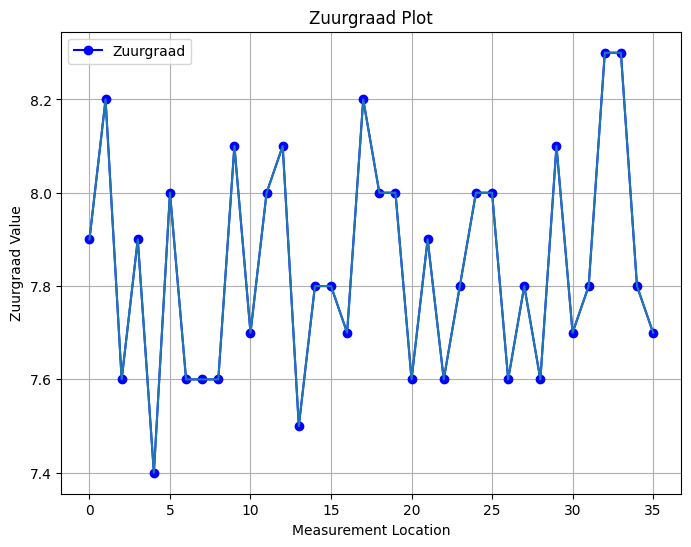

In [36]:
# Plot the 'zuurgraad' column from your DataFrame
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(df_final['zuurgraad'], marker='o', linestyle='-', color='b', label='Zuurgraad')

# Add labels and title
plt.xlabel('Measurement Location')
plt.ylabel('Zuurgraad Value')
plt.title('Zuurgraad Plot')

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)
plt.plot(df_final['zuurgraad'])
plt.show()
